In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load data
df = pd.read_csv('results.csv')

# Sparse matrix
sparse_matrix_name = 'amazon0302'

# Value of k (number of columns in the Dense Vector)
k = 3

# Filter out the data based on the sparse matrix name
df_filtered = df[df['File Name'].str.contains(sparse_matrix_name) & df['File Name'].str.contains('k' + str(k))]
df_filtered.head()

,File Name,Cores Number,Sparse Matrix,Dense Vector,Serial Algo Execution time,Row-wise Average Communication Time,Row-wise Average Computation Time,Row-wise Execution time,Row-wise Result,Column-wise Average Communication Time,Column-wise Average Computation Time,Column-wise Execution time,Column-wise Result,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,Non-zero Elements Execution time,Non-zero Elements Result,PETSc Execution time,PETSc Result
180,amazon0302_mtx_k3_cores10_chunks1_cpus10,10,262111x262111,262111x3,0.201925,0.003069,0.017520,0.164335,same,0.020792,0.017945,0.328216,same,0.015456,0.032684,0.196207,same,0.013935,same
181,amazon0302_mtx_k3_cores10_chunks2_cpus5,10,262111x262111,262111x3,0.173028,0.001625,0.015148,0.148610,same,0.017462,0.014748,0.283842,same,0.014398,0.029999,0.181229,same,0.011172,same
182,amazon0302_mtx_k3_cores10_chunks5_cpus2,10,262111x262111,262111x3,0.178708,0.001676,0.016166,0.154984,same,0.021895,0.019021,0.332164,same,0.015241,0.032428,0.188711,same,0.012765,same
183,amazon0302_mtx_k3_cores11_chunks1_cpus11,11,262111x262111,262111x3,0.183180,0.001645,0.014569,0.157437,same,0.016284,0.013470,0.295309,same,0.013953,0.030270,0.194759,same,0.011617,same
184,amazon0302_mtx_k3_cores12_chunks1_cpus12,12,262111x262111,262111x3,0.188406,0.002200,0.014457,0.160287,same,0.016732,0.013803,0.318467,same,0.015227,0.030346,0.194285,same,0.012187,same


In [10]:
df_error = df_filtered[
    (df_filtered['Column-wise Result'] == "different") |
    (df_filtered['Row-wise Result'] == "different") |
    (df_filtered['Non-zero Elements Result'] == "different") |
    (df_filtered["PETSc Result"] == "different")
]
print("Number of errors: ", len(df_error))
df_error.head()


Number of errors:  0


,File Name,Cores Number,Sparse Matrix,Dense Vector,Serial Algo Execution time,Row-wise Average Communication Time,Row-wise Average Computation Time,Row-wise Execution time,Row-wise Result,Column-wise Average Communication Time,Column-wise Average Computation Time,Column-wise Execution time,Column-wise Result,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,Non-zero Elements Execution time,Non-zero Elements Result,PETSc Execution time,PETSc Result


In [11]:
import re

# Function to extract the number of chunks and processes per chunk from the file name
def extract_chunks_and_processes(file_name):
    match = re.search(r'cores(\d+)_chunks(\d+)_cpus(\d+)', file_name)
    if match:
        #total_cores = int(match.group(1))
        chunks = int(match.group(2))
        cpus_per_chunk = int(match.group(3))
        return chunks, cpus_per_chunk
    else:
        return None, None

# Apply the function to the dataframe
df_filtered[['Chunks', 'CPUs per Chunk']] = df_filtered.apply(lambda row: extract_chunks_and_processes(row['File Name']), axis=1, result_type='expand')

df_filtered.head()


/var/folders/dl/8q6wl_5d3xg5j5ynz7vqlq_c0000gn/T/ipykernel_44769/2506897266.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Chunks', 'CPUs per Chunk']] = df_filtered.apply(lambda row: extract_chunks_and_processes(row['File Name']), axis=1, result_type='expand')
/var/folders/dl/8q6wl_5d3xg5j5ynz7vqlq_c0000gn/T/ipykernel_44769/2506897266.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Chunks', 'CPUs per Chunk']] = df_filtered.apply(lambda row: extract_chunks_and_processes

,File Name,Cores Number,Sparse Matrix,Dense Vector,Serial Algo Execution time,Row-wise Average Communication Time,Row-wise Average Computation Time,Row-wise Execution time,Row-wise Result,Column-wise Average Communication Time,...,Column-wise Execution time,Column-wise Result,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,Non-zero Elements Execution time,Non-zero Elements Result,PETSc Execution time,PETSc Result,Chunks,CPUs per Chunk
180,amazon0302_mtx_k3_cores10_chunks1_cpus10,10,262111x262111,262111x3,0.201925,0.003069,0.017520,0.164335,same,0.020792,...,0.328216,same,0.015456,0.032684,0.196207,same,0.013935,same,1,10
181,amazon0302_mtx_k3_cores10_chunks2_cpus5,10,262111x262111,262111x3,0.173028,0.001625,0.015148,0.148610,same,0.017462,...,0.283842,same,0.014398,0.029999,0.181229,same,0.011172,same,2,5
182,amazon0302_mtx_k3_cores10_chunks5_cpus2,10,262111x262111,262111x3,0.178708,0.001676,0.016166,0.154984,same,0.021895,...,0.332164,same,0.015241,0.032428,0.188711,same,0.012765,same,5,2
183,amazon0302_mtx_k3_cores11_chunks1_cpus11,11,262111x262111,262111x3,0.183180,0.001645,0.014569,0.157437,same,0.016284,...,0.295309,same,0.013953,0.030270,0.194759,same,0.011617,same,1,11
184,amazon0302_mtx_k3_cores12_chunks1_cpus12,12,262111x262111,262111x3,0.188406,0.002200,0.014457,0.160287,same,0.016732,...,0.318467,same,0.015227,0.030346,0.194285,same,0.012187,same,1,12


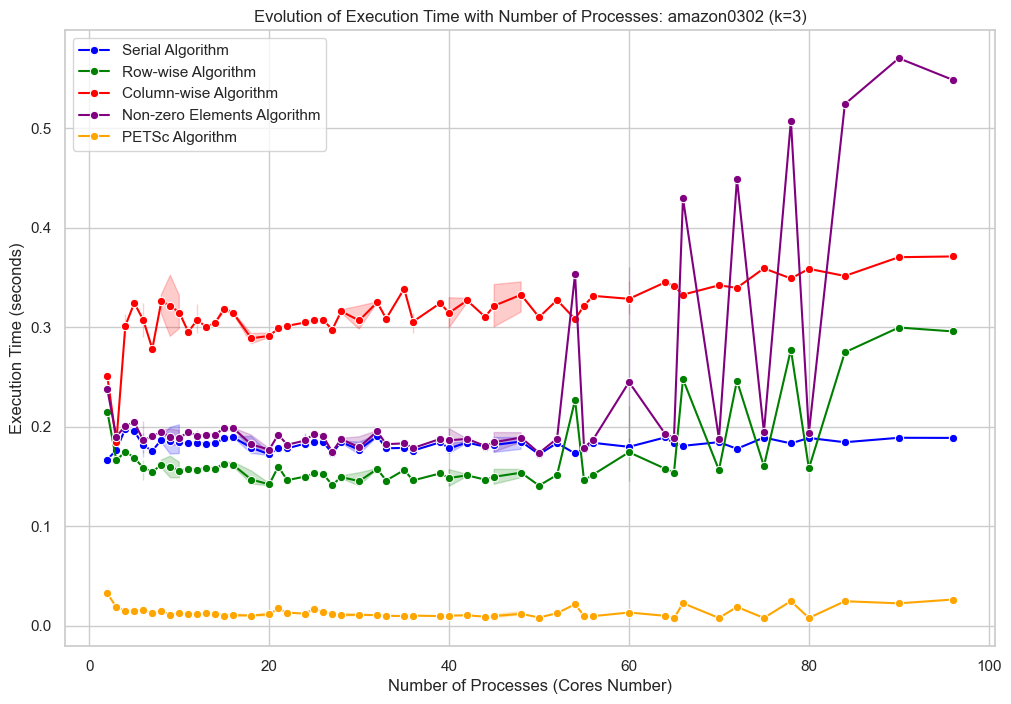

In [12]:
# Sorting the dataframe based on 'Cores Number' for better plotting
df_sorted = df_filtered.sort_values(by='Cores Number')

# Plotting using Seaborn
plt.figure(figsize=(12, 8))

# Setting the style
sns.set(style="whitegrid")

# Plot for each algorithm
sns.lineplot(x='Cores Number', y='Serial Algo Execution time', data=df_sorted, marker='o', label='Serial Algorithm', color='blue')
sns.lineplot(x='Cores Number', y='Row-wise Execution time', data=df_sorted, marker='o', label='Row-wise Algorithm', color='green')
sns.lineplot(x='Cores Number', y='Column-wise Execution time', data=df_sorted, marker='o', label='Column-wise Algorithm', color='red')
sns.lineplot(x='Cores Number', y='Non-zero Elements Execution time', data=df_sorted, marker='o', label='Non-zero Elements Algorithm', color='purple')
sns.lineplot(x='Cores Number', y='PETSc Execution time', data=df_sorted, marker='o', label='PETSc Algorithm', color='orange')

plt.xlabel('Number of Processes (Cores Number)')
plt.ylabel('Execution Time (seconds)')
plt.title('Evolution of Execution Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
plt.legend()

# Saving the plot in the 'results' folder
plt.savefig('results/' + sparse_matrix_name + '_k' + str(k) + '.png')

plt.show()

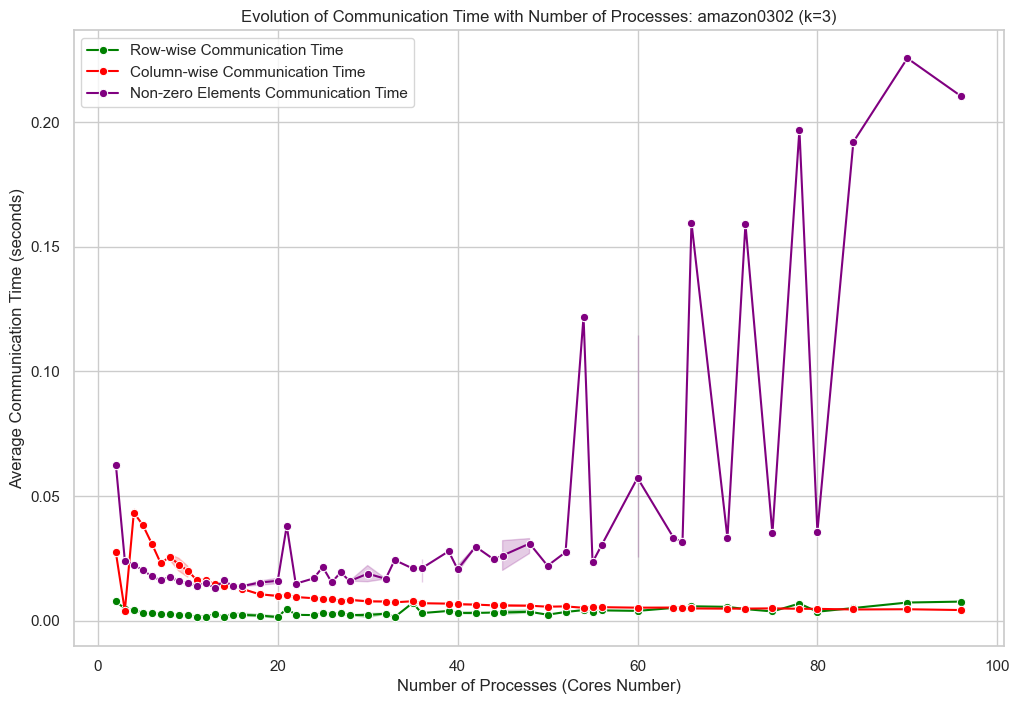

In [13]:
# Plotting using Seaborn
plt.figure(figsize=(12, 8))

# Setting the style
sns.set(style="whitegrid")

# Row-wise Communication Time
sns.lineplot(x='Cores Number', y='Row-wise Average Communication Time', data=df_sorted, marker='o', label='Row-wise Communication Time', color='green')

# Column-wise Communication Time
sns.lineplot(x='Cores Number', y='Column-wise Average Communication Time', data=df_sorted, marker='o', label='Column-wise Communication Time', color='red')

# Non-zero elements Communication Time
sns.lineplot(x='Cores Number', y='Non-zero elements Average Communication Time', data=df_sorted, marker='o', label='Non-zero Elements Communication Time', color='purple')

plt.xlabel('Number of Processes (Cores Number)')
plt.ylabel('Average Communication Time (seconds)')
plt.title('Evolution of Communication Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
plt.legend()

plt.show()

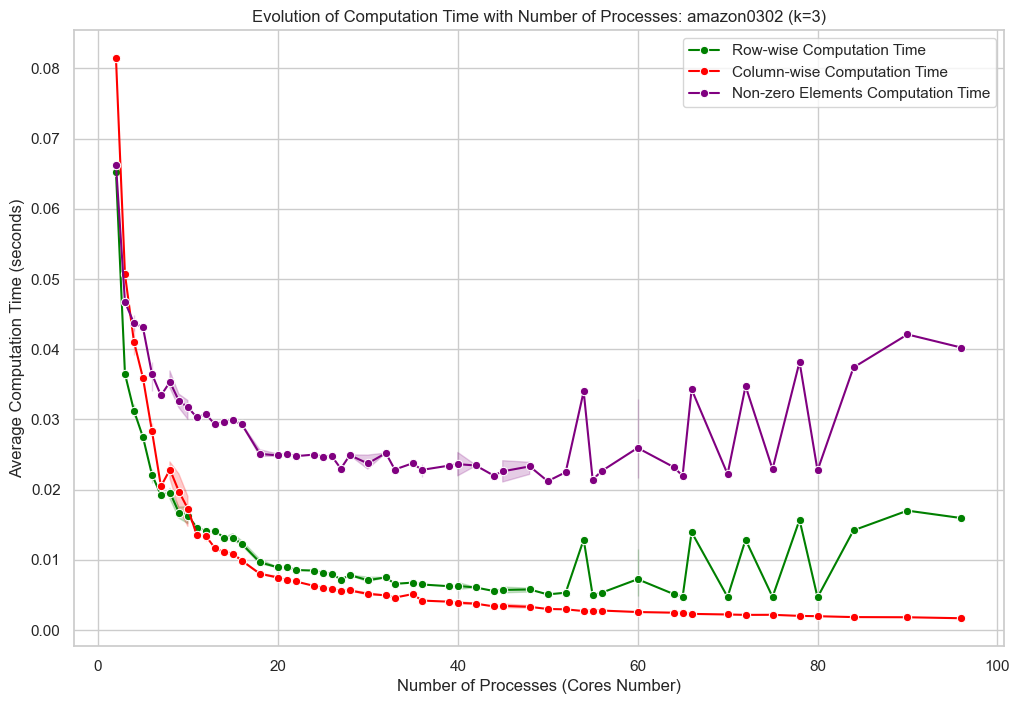

In [14]:
# Plotting using Seaborn
plt.figure(figsize=(12, 8))

# Setting the style
sns.set(style="whitegrid")

# Row-wise Computation Time
sns.lineplot(x='Cores Number', y='Row-wise Average Computation Time', data=df_sorted, marker='o', label='Row-wise Computation Time', color='green')

# Column-wise Computation Time
sns.lineplot(x='Cores Number', y='Column-wise Average Computation Time', data=df_sorted, marker='o', label='Column-wise Computation Time', color='red')

# Non-zero elements Computation Time
sns.lineplot(x='Cores Number', y='Non-zero elements Average Computation Time', data=df_sorted, marker='o', label='Non-zero Elements Computation Time', color='purple')

plt.xlabel('Number of Processes (Cores Number)')
plt.ylabel('Average Computation Time (seconds)')
plt.title('Evolution of Computation Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
plt.legend()

plt.show()